## Periodic features

Periodic features are those that repeat at regular interval, such as hours, the days of a week, the month of a year, etc.

With cyclical or periodic features, values that are very different in absolute magnitude are actually close. Example: January (1) is close to December (12).

We can use periodic functions like sine, cosine, to transform cyclycal features and help machine learning models pick up their intricsic nature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Create toy data to work with
df = pd.DataFrame([i for i in range(24)], columns=['hour'])
print(df.head())
print(df.tail())


   hour
0     0
1     1
2     2
3     3
4     4
    hour
19    19
20    20
21    21
22    22
23    23


Let's determine the time elapsed between 22 hours and midnight, that must be 2 in reality


In [4]:
df.iloc[22] - df.iloc[0]

hour    22
dtype: int64

Without any transformation, it is just 22 in our number system. So we need a more meaningful approach so that we can capture the reality in our machine learning models

### Sin and Cosine transformations

In [5]:
df["hour_sin"] = np.sin(df["hour"] / df["hour"].max() * 2 * np.pi)
df["hour_cos"] = np.cos(df["hour"] / df["hour"].max() * 2 * np.pi)
df.head()

,hour,hour_sin,hour_cos
0,0,0.000000,1.000000
1,1,0.269797,0.962917
2,2,0.519584,0.854419
3,3,0.730836,0.682553
4,4,0.887885,0.460065


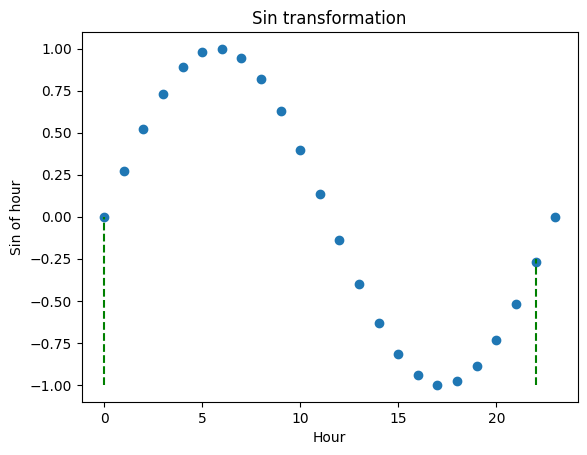

In [6]:
# Plot hour vs its trigonometric transformation
plt.scatter(df["hour"], df["hour_sin"])

plt.ylabel("Sin of hour")
plt.xlabel("Hour")
plt.title("Sin transformation")

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=22, ymin=-1, ymax=-0.25, colors='g', linestyles='dashed')
plt.show()

We can observe that after the transformation, 0 and 22 are much closer.
We could also observe that different hours could take the same value after the transformation, like below

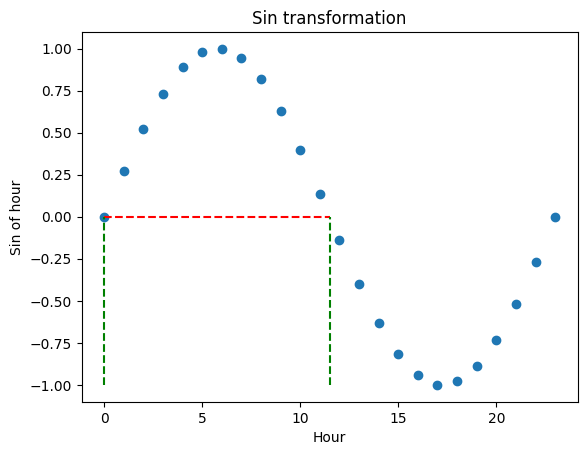

In [10]:
plt.scatter(df["hour"], df["hour_sin"])

plt.ylabel("Sin of hour")
plt.xlabel("Hour")
plt.title("Sin transformation")

plt.hlines(y=0, xmin=0, xmax=11.5, color="r", linestyles="dashed")
plt.vlines(x=0, ymin=-1, ymax=0, colors="g", linestyles="dashed")
plt.vlines(x=11.5, ymin=-1, ymax=0, colors="g", linestyles="dashed")
plt.show()

In the plot aboved, we see the hour 0 and 11.5 take roughly the same value after the sin transformation. The same is true for the cosine transformation, see below:

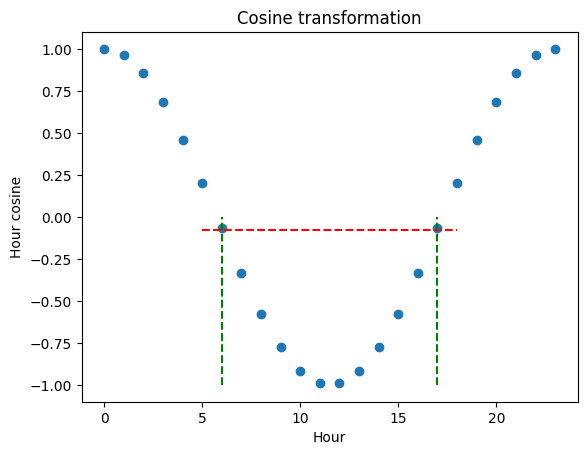

In [27]:
plt.scatter(df["hour"], df["hour_cos"])

plt.xlabel("Hour")
plt.ylabel("Hour cosine")
plt.title("Cosine transformation")

plt.hlines(y=-0.075, xmin=5, xmax=18, colors="r", linestyles="dashed")
plt.vlines(x=6, ymax=0, ymin=-1, colors="g", linestyles="dashed")
plt.vlines(x=17, ymax=0, ymin=-1, colors="g", linestyles="dashed")

plt.show()

We can see that hour 6 and 17 are roughly take the same cosine value after the transformation. So how can we distinguish the hour 0 from 11.5 or 5 from 17? see the plot below

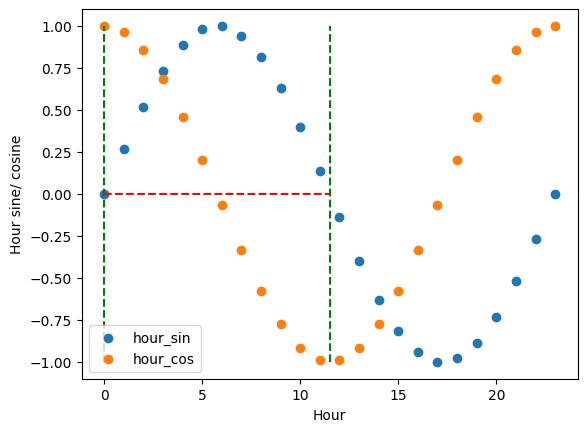

In [31]:
plt.scatter(df["hour"], df["hour_sin"])
plt.scatter(df["hour"], df["hour_cos"])

plt.xlabel("Hour")
plt.ylabel("Hour sine/ cosine")

plt.vlines(x=0, ymin=-1, ymax=1, colors="g", linestyles="dashed")
plt.vlines(x=11.5, ymin=-1, ymax=1, colors="g", linestyles="dashed")
plt.hlines(y=0, xmin=0, xmax=11.5, colors="r", linestyles="dashed")

plt.legend(["hour_sin", "hour_cos"])
plt.show()

We can identify 0 by sin=0, cos=1; while 11.5 is represented by (sin=0, cos=-1). The combinations of sine and cosine occur only at those hours, so they uniquely identify positions in the 24-hour cycle. With this, each hour become a point (sin(hour), cos(hour)), plot those points, we can expect a 24 hour clock.

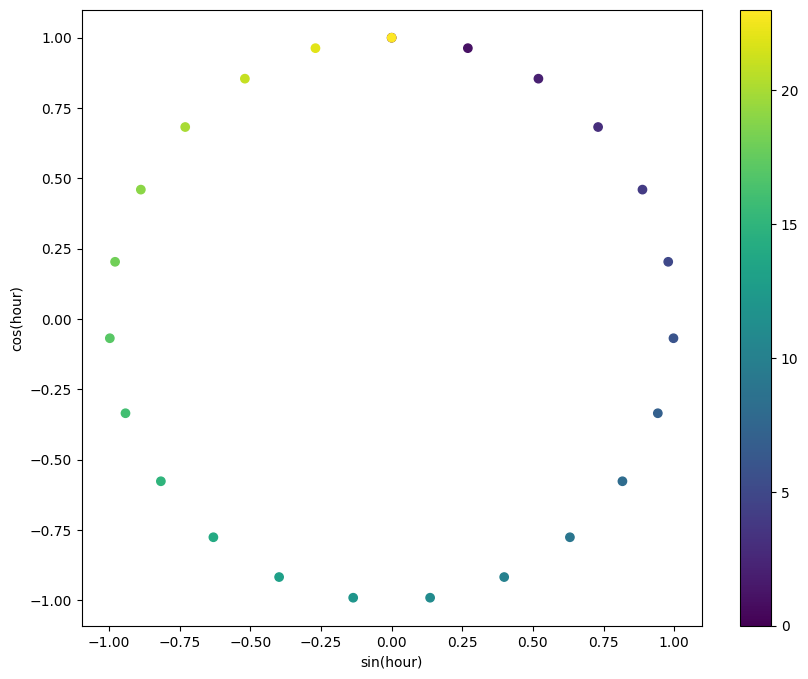

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)"
)
_ = fig.colorbar(sp)